In [1]:
import logging
import pathlib

import pandas as pd

from topollm.analysis.compare_sampling_methods.make_plots import (
    create_boxplot_of_mean_over_different_sampling_seeds,
    generate_fixed_params_text,
)
from topollm.analysis.compare_sampling_methods.run_general_comparisons import (
    Y_AXIS_LIMITS,
    filter_dataframe_based_on_filters_dict,
)
from topollm.config_classes.constants import TOPO_LLM_REPOSITORY_BASE_PATH

default_logger: logging.Logger = logging.getLogger(name=__name__)
logger: logging.Logger = default_logger

Setting HYDRA_FULL_ERROR environment variable to '1'.
os.environ['HYDRA_FULL_ERROR'] = '1'


In [2]:
comparisons_folder_base_path = pathlib.Path(
    TOPO_LLM_REPOSITORY_BASE_PATH,
    "data/analysis/sample_sizes/run_general_comparisons/array_truncation_size=5000/analysis/twonn/",
)

In [3]:
root_dir = comparisons_folder_base_path

# Initialize an empty list to store dataframes
dfs = []

# Traverse the directory structure using pathlib's rglob
for file_path in root_dir.rglob(pattern="full_local_estimates_df.csv"):
    # Load the CSV file into a dataframe
    df = None

    try:
        df = pd.read_csv(filepath_or_buffer=file_path, keep_default_na=False)
        dfs.append(df)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

    # Append the dataframe to the list
    dfs.append(df)

# Concatenate the dataframes
if dfs:
    concatenated_df = pd.concat(dfs, ignore_index=True)
else:
    concatenated_df = pd.DataFrame()  # Empty dataframe if no files found

# Save the concatenated dataframe
output_path = pathlib.Path(root_dir, "concatenated_full_local_estimates_df.csv")
concatenated_df.to_csv(output_path, index=False)


In [4]:
concatenated_filters_dict = {
    "data_full": "data-multiwoz21_split-validation_ctxt-dataset_entry_samples-3000_feat-col-ner_tags",
    "data_prep_sampling_method": "random",
    "deduplication": "array_deduplicator",
    "model_partial_name": "model-model-roberta-base_task-masked_lm_multiwoz21-train-10000-ner_tags_ftm-standard_lora-None_5e-05-constant-0.01-50",
    "n_neighbors": 128,
    "data_prep_sampling_samples": 100_000,
    "local_estimates_samples": 60_000,
}

filtered_concatenated_df = filter_dataframe_based_on_filters_dict(
    df=concatenated_df,
    filters_dict=concatenated_filters_dict,
)

filtered_concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 5408 to 6223
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   30 non-null     int64  
 1   path                         30 non-null     object 
 2   array_name                   30 non-null     object 
 3   array_data                   30 non-null     object 
 4   data_prep_sampling_method    30 non-null     object 
 5   data_prep_sampling_seed      30 non-null     int64  
 6   data_prep_sampling_samples   30 non-null     int64  
 7   local_estimates_desc_full    30 non-null     object 
 8   local_estimates_description  30 non-null     object 
 9   local_estimates_samples      30 non-null     int64  
 10  zerovec                      30 non-null     object 
 11  deduplication                30 non-null     object 
 12  model_full                   30 non-null     object 
 13  model_task            

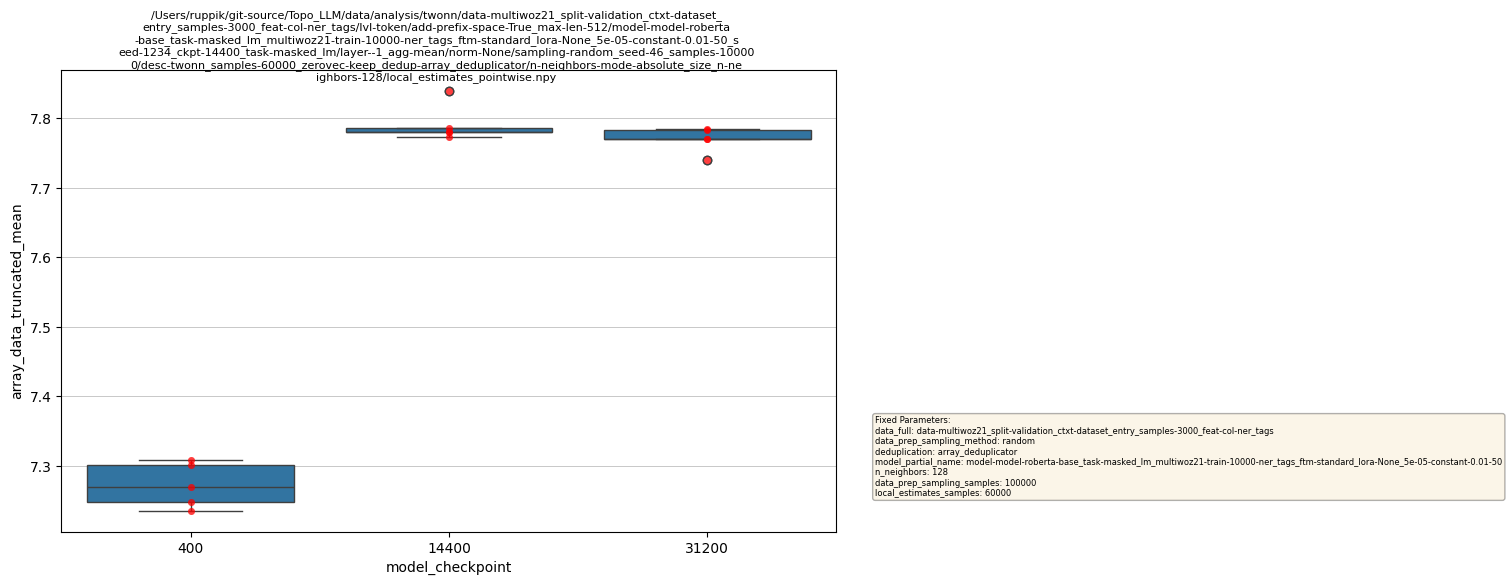

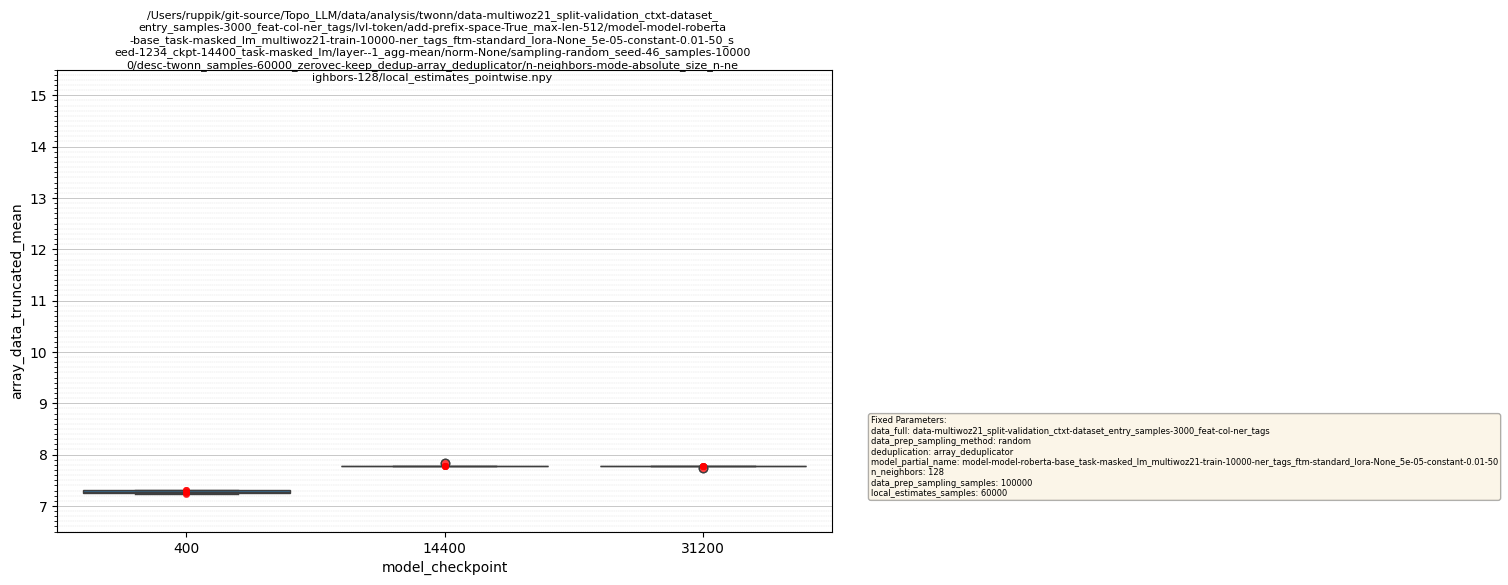

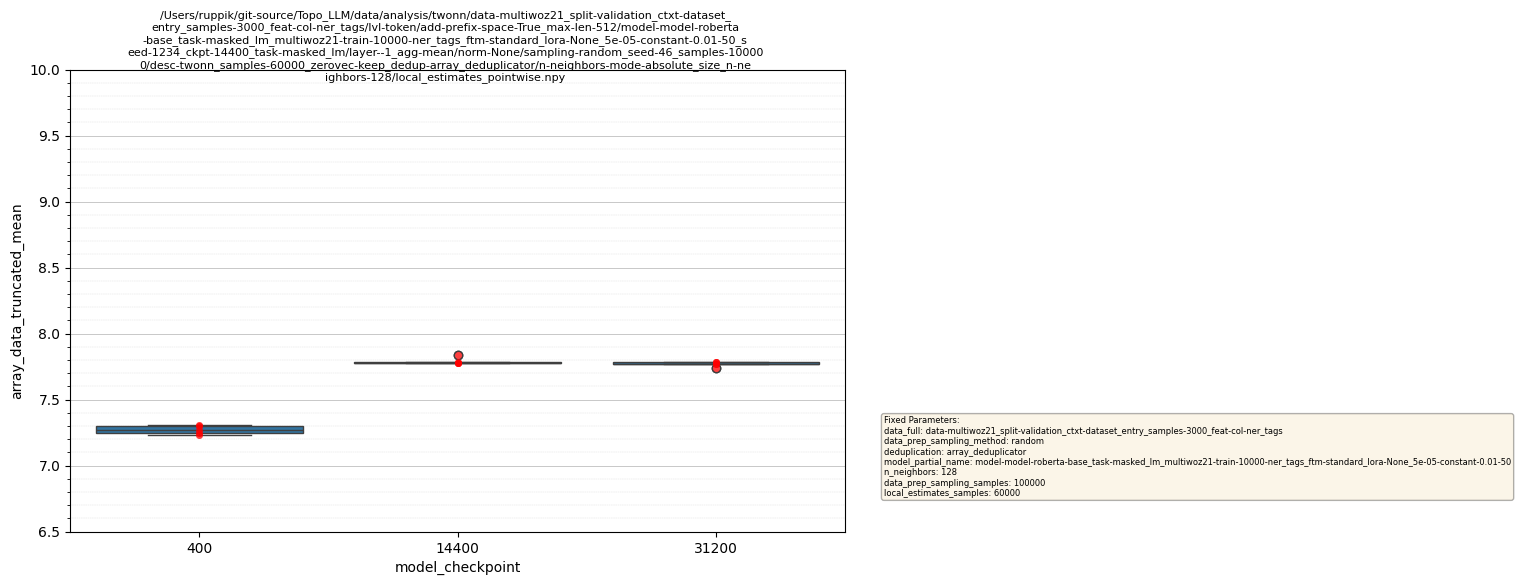

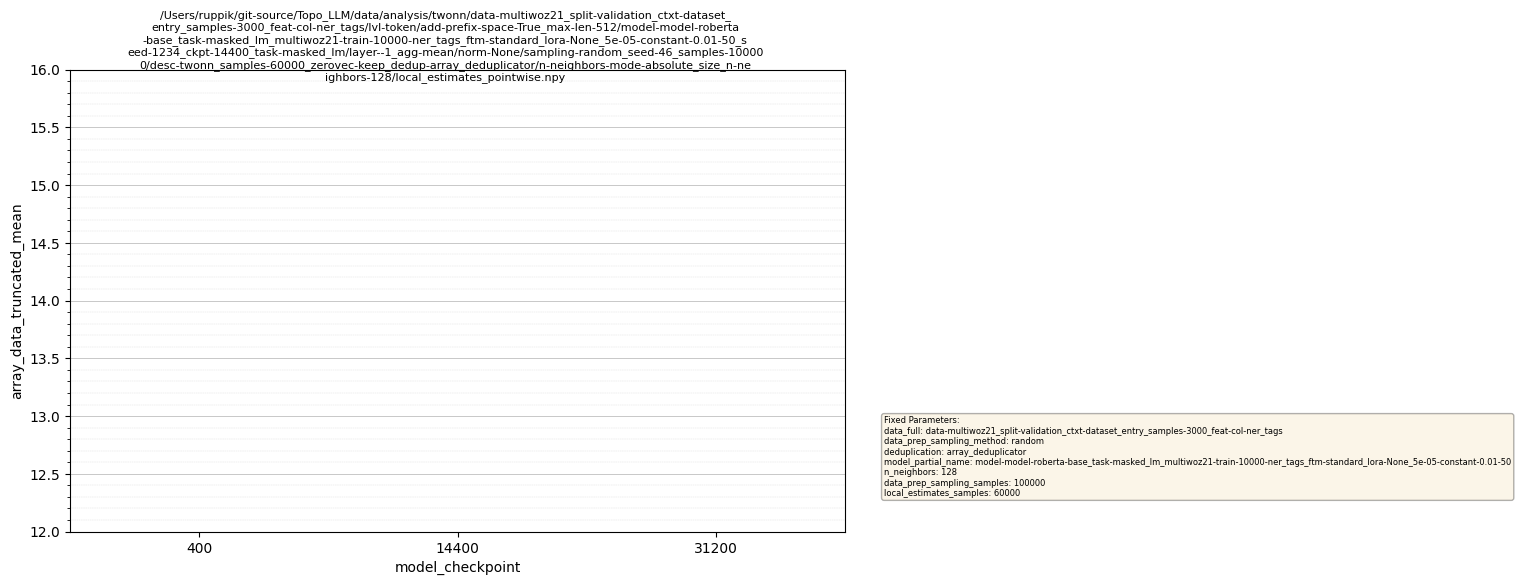

In [5]:
# Group "filtered_concatenated_df" by value in 'model_checkpoint' column
# and make a boxplot of "array_data_truncated_mean" for each group

fixed_params_text: str = generate_fixed_params_text(
    filters_dict=concatenated_filters_dict,
)

for y_min, y_max in Y_AXIS_LIMITS.values():
    create_boxplot_of_mean_over_different_sampling_seeds(
        subset_local_estimates_df=filtered_concatenated_df,
        x_column_name="model_checkpoint",
        y_column_name="array_data_truncated_mean",
        fixed_params_text=fixed_params_text,
        y_min=y_min,
        y_max=y_max,
        logger=logger,
    )

In [6]:
filtered_concatenated_df

,Unnamed: 0,path,array_name,array_data,data_prep_sampling_method,data_prep_sampling_seed,data_prep_sampling_samples,local_estimates_desc_full,local_estimates_description,local_estimates_samples,...,samples,feature_column,neighbors_mode,n_neighbors,num_elements,array_data_truncated,array_data_mean,array_data_std,array_data_truncated_mean,array_data_truncated_std
5408,37,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[11.21441545 6.82233874 7.49296171 ... 4.63...,random,46,100000,desc-twonn_samples-60000_zerovec-keep_dedup-ar...,twonn,60000,...,3000,ner_tags,absolute,128.0,54549,[11.21441545 6.82233874 7.49296171 ... 4.04...,7.810935,2.512102,7.773853,2.524423
5419,59,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[ 6.83078041 8.24828119 4.63926703 ... 8.91...,random,44,100000,desc-twonn_samples-60000_zerovec-keep_dedup-ar...,twonn,60000,...,3000,ner_tags,absolute,128.0,54549,[6.83078041 8.24828119 4.63926703 ... 6.788084...,7.810935,2.512102,7.780307,2.551901
5466,123,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[ 5.97357003 11.01493825 6.21037598 ... 11.15...,random,43,100000,desc-twonn_samples-60000_zerovec-keep_dedup-ar...,twonn,60000,...,3000,ner_tags,absolute,128.0,54549,[ 5.97357003 11.01493825 6.21037598 ... 9.67...,7.810935,2.512102,7.785596,2.511696
5478,147,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[11.79659251 9.039831 8.61925527 ... 5.17...,random,42,100000,desc-twonn_samples-60000_zerovec-keep_dedup-ar...,twonn,60000,...,3000,ner_tags,absolute,128.0,54549,[11.79659251 9.039831 8.61925527 ... 12.05...,7.810935,2.512102,7.840188,2.540684
5488,167,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[11.92245389 9.90540776 7.98613337 ... 4.25...,random,45,100000,desc-twonn_samples-60000_zerovec-keep_dedup-ar...,twonn,60000,...,3000,ner_tags,absolute,128.0,54549,[11.92245389 9.90540776 7.98613337 ... 9.36...,7.810935,2.512102,7.780098,2.549111
5555,37,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[11.21441545 6.82233874 7.49296171 ... 4.63...,random,46,100000,desc-twonn_samples-60000_zerovec-keep_dedup-ar...,twonn,60000,...,3000,ner_tags,absolute,128.0,54549,[11.21441545 6.82233874 7.49296171 ... 4.04...,7.810935,2.512102,7.773853,2.524423
5566,59,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[ 6.83078041 8.24828119 4.63926703 ... 8.91...,random,44,100000,desc-twonn_samples-60000_zerovec-keep_dedup-ar...,twonn,60000,...,3000,ner_tags,absolute,128.0,54549,[6.83078041 8.24828119 4.63926703 ... 6.788084...,7.810935,2.512102,7.780307,2.551901
5613,123,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[ 5.97357003 11.01493825 6.21037598 ... 11.15...,random,43,100000,desc-twonn_samples-60000_zerovec-keep_dedup-ar...,twonn,60000,...,3000,ner_tags,absolute,128.0,54549,[ 5.97357003 11.01493825 6.21037598 ... 9.67...,7.810935,2.512102,7.785596,2.511696
5625,147,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[11.79659251 9.039831 8.61925527 ... 5.17...,random,42,100000,desc-twonn_samples-60000_zerovec-keep_dedup-ar...,twonn,60000,...,3000,ner_tags,absolute,128.0,54549,[11.79659251 9.039831 8.61925527 ... 12.05...,7.810935,2.512102,7.840188,2.540684
5635,167,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[11.92245389 9.90540776 7.98613337 ... 4.25...,random,45,100000,desc-twonn_samples-60000_zerovec-keep_dedup-ar...,twonn,60000,...,3000,ner_tags,absolute,128.0,54549,[11.92245389 9.90540776 7.98613337 ... 9.36...,7.810935,2.512102,7.780098,2.549111


In [7]:
filtered_concatenated_df["model_partial_name"].unique()

array(['model-model-roberta-base_task-masked_lm_multiwoz21-train-10000-ner_tags_ftm-standard_lora-None_5e-05-constant-0.01-50'],
      dtype=object)

In [8]:
data_folder_list: list[str] = [
    "data-multiwoz21_split-train_ctxt-dataset_entry_samples-10000_feat-col-ner_tags/",
    "data-multiwoz21_split-validation_ctxt-dataset_entry_samples-3000_feat-col-ner_tags/",
    "data-multiwoz21_split-test_ctxt-dataset_entry_samples-3000_feat-col-ner_tags/",
    "data-one-year-of-tsla-on-reddit_split-train_ctxt-dataset_entry_samples-10000_feat-col-ner_tags/",
    "data-one-year-of-tsla-on-reddit_split-validation_ctxt-dataset_entry_samples-3000_feat-col-ner_tags/",
]

model_folder_list: list[str] = [
    "model-roberta-base_task-masked_lm/",
]

selected_data_folder = data_folder_list[4]
selected_model_folder = model_folder_list[0]

file_path = pathlib.Path(
    comparisons_folder_base_path,
    selected_data_folder,
    "lvl-token/add-prefix-space-True_max-len-512/",
    selected_model_folder,
    "layer--1_agg-mean/norm-None/",
    "full_local_estimates_df.csv",
)

results_base_directory_path: pathlib.Path = file_path.parent

local_estimates_df: pd.DataFrame = pd.read_csv(
    filepath_or_buffer=file_path,
)

# Select a subset of the data with the same parameters.
# This allows comparing over different seeds.
#
# We do not fix the local_estimates_samples,
# since we want to compare the results for different sample sizes.

filters_dict = {
    "data_prep_sampling_method": "random",
    "deduplication": "array_deduplicator",
    "n_neighbors": 128,
    "data_prep_sampling_samples": 50000,
}

subset_local_estimates_df = filter_dataframe_based_on_filters_dict(df=local_estimates_df, filters_dict=filters_dict)

subset_local_estimates_df.describe()

,Unnamed: 0,data_prep_sampling_seed,data_prep_sampling_samples,local_estimates_samples,model_checkpoint,model_seed,model_layer,normalization,samples,n_neighbors,num_elements,array_data_mean,array_data_std,array_data_truncated_mean,array_data_truncated_std
count,200.000000,200.000000,200.0,200.000000,0.0,0.0,200.0,0.0,200.0,200.0,200.000000,200.000000,200.000000,200.000000,200.000000
mean,608.150000,51.500000,50000.0,27500.000000,NaN,NaN,-1.0,NaN,3000.0,128.0,27432.185000,13.268248,4.112009,13.271778,4.115072
std,330.240551,5.780751,0.0,14397.445335,NaN,NaN,0.0,NaN,0.0,0.0,14291.993163,0.475969,0.324772,0.478492,0.332824
min,95.000000,42.000000,50000.0,5000.000000,NaN,NaN,-1.0,NaN,3000.0,128.0,5000.000000,12.557652,3.090839,12.565677,3.090839
25%,275.000000,46.750000,50000.0,15000.000000,NaN,NaN,-1.0,NaN,3000.0,128.0,15000.000000,12.916593,4.021203,12.915199,3.992495
50%,656.000000,51.500000,50000.0,27500.000000,NaN,NaN,-1.0,NaN,3000.0,128.0,27500.000000,13.165960,4.221504,13.180874,4.213067
75%,830.500000,56.250000,50000.0,40000.000000,NaN,NaN,-1.0,NaN,3000.0,128.0,40000.000000,13.541943,4.317664,13.558237,4.321614
max,1113.000000,61.000000,50000.0,50000.000000,NaN,NaN,-1.0,NaN,3000.0,128.0,49365.000000,15.256311,4.653293,15.256311,4.700982
